# Udacity - Communicate Data Findings (Dataset: Loan Data from Prosper)
## by Justin Olgui

## Preliminary Wrangling

This dataset contains data from over 100,000 prosper loans. <br>
Each row contains information about a specific loan that was funded through the Prosper marketplace. <br>

Who is prosper? <br>
Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States. Since 2005, Prosper has facilitated more than $15 billion in loans to more than 930,000 people. <br>

What is peer2peer lending? <br>
For those who are not familiar, Prosper does not actually lend money, they essentially provide a marketplace for lenders and borrowers to meet, think online dating for loans. As a prospective borrower, you would go through the process of filling out an application, why do you want money, how much do you make, are you employed and so on. They will then assign you a Prosperscore and put your loan up on their marketplace at which point lenders who are looking for higher rate investment returns can choose to fund a portion, or the entirety of your loan. Some of the information on our borrower includes but is not limited to APR, Employment status, credit rating, term, occupation, etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load csv into dataframe
Loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Check to ensure it was read in properly
pd.set_option('display.max_columns', 81)
Loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#Checking out the structure of our dataset
Loan_df.shape

(113937, 81)

In [5]:
# Checking out the dataset's info
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

This dataset contains 113937 loans with 81 different variables. <br>
Our column definitions can be found in "Prosper Loan Data - Columns Definitions.csv"

### What are the main features of interest in your dataset?

Through our exploration i'm wanting to answer some of the following questions I have:
    
    - Who are the borrowers? (financial health, income levels, debt ratios, etc.)
    - Why are they borrowing money?
    - How much are they paying in interest?
    - Are these metrics changing over time?
    
My objective is to better understand what are the most significant factors in obtaining reduced rates and are those factors changing over time?

### What features in the dataset do you think will help support your investigation into your features of interest?

This dataset is filled with a ton of personal information on our borrowers. Some of the standard finance metrics are quite helpful on their own. (DebtToIncomeRatio, CreditGrade, StatedMonthlyIncome, RevolvingCreditBalance, BorrowerAPR, etc.) However by combining these variables I think we should be able to gather some interesting insights and better understanding our borrowers.

In [6]:
''' 
I'll begin by creating a new column CreditScoreMean.
This column will be the mean of CreditScoreRangeLower and CreditScoreRangeUpper.
The purpose is to reduce the total number of variables i'm using in my analysis.
'''
Loan_df['CreditScoreMean'] = Loan_df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

In [7]:
# We'll now condense our dataset as it is not feasible to use all 81 variables
Condensed_prosper = Loan_df[['ListingCreationDate', 'CreditScoreMean', 'ProsperScore', 'Term', 'MonthlyLoanPayment', \
                             'StatedMonthlyIncome', 'BorrowerAPR', 'DebtToIncomeRatio','RevolvingCreditBalance', \
                             'BorrowerState', 'ListingCategory (numeric)']]                           
                            

# Variable Defintions

Taken from our Prosper Loan Data - Columns Definitions.csv that was provided with the dataset I will now define the individual variables i have selected for my analysis:

__CreditScoreMean:__ This column is the mean of CreditScoreRangeLower and CreditScoreRangeUpper.<br>

__ProsperScore:__ A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.<br>

__Term:__ The length of the loan expressed in months.<br>

__MonthlyLoanPayment:__ The scheduled monthly loan payment.<br>

__StatedMonthlyIncome:__ The monthly income the borrower stated at the time the listing was created.<br>

__BorrowerAPR:__ The Borrower's Annual Percentage Rate (APR) for the loan.<br>

__DebtToIncomeRatio:__ The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).<br>

__RevolvingCreditBalance:__ Dollars of revolving credit at the time the credit profile was pulled.<br>

__BorrowerState:__ The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.<br>

__ListingCategory:__ Determines the category of loan that the borrower needs money for.<br>

## Univariate Exploration

We'll begin our analysis by plotting distributions for each of our individual variables we have selected. Each variable helps us to better understand one aspect of our individual borrowers. Plotting a distribution will give us insights into the group as a whole.

In [8]:
#We'll check to see we got all the right information
Condensed_prosper.head()

,ListingCreationDate,CreditScoreMean,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory (numeric)
0,2007-08-26 19:09:29.263000000,649.5,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,0
1,2014-02-27 08:28:07.900000000,689.5,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,2
2,2007-01-05 15:00:47.090000000,489.5,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,0
3,2012-10-22 11:02:35.010000000,809.5,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,16
4,2013-09-14 18:38:39.097000000,689.5,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,2


In [9]:
# calling info to review our columns
Condensed_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingCreationDate          113937 non-null object
CreditScoreMean              113346 non-null float64
ProsperScore                 84853 non-null float64
Term                         113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
StatedMonthlyIncome          113937 non-null float64
BorrowerAPR                  113912 non-null float64
DebtToIncomeRatio            105383 non-null float64
RevolvingCreditBalance       106333 non-null float64
BorrowerState                108422 non-null object
ListingCategory (numeric)    113937 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 9.6+ MB


In [10]:
#convert to datetime
Condensed_prosper['ListingCreationDate'] = pd.to_datetime(Condensed_prosper.ListingCreationDate)

In [11]:
# Create a new series and then convert to Quarters
quarters = pd.Series(Condensed_prosper['ListingCreationDate'])
quarters = pd.PeriodIndex(quarters, freq='Q')

In [12]:
# Add a new column to our DF
Condensed_prosper['Quarters'] = quarters

In [13]:
# Grab the unique values in our quarters column
quarters = Condensed_prosper['Quarters'].unique()

In [14]:
# Sort our list in chronological order
quarters = sorted(quarters)

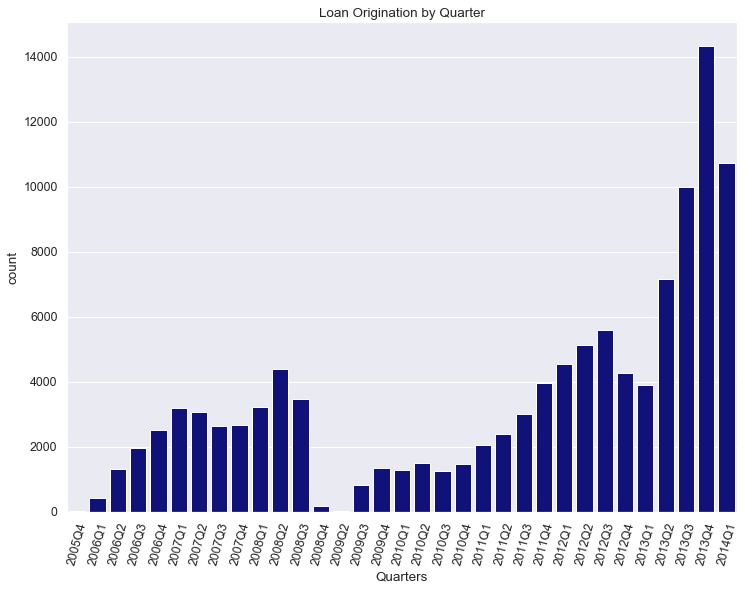

In [15]:
#Draw our distribution
plt.figure(figsize=(12, 9))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
g = sb.countplot(x='Quarters', data=Condensed_prosper, color="darkblue", order=quarters);
g.set_xticklabels(g.get_xticklabels(), rotation=75)
plt.title('Loan Origination by Quarter');

The first thing that jumps out to me is that at Q3 of 2008 prosper loans essentially fell off a cliff. The timing is peculiar because this is when the economic crisis of 2008 came to light, this was no coincidence. Prosper was clearly hit hard by this economic downturn. Since then Prosper has experienced some serious growth. Aside from the Q4 2012 and the Q1 2013 prosper loans have increased quarter over quarter since 2010 at what appears to be a parabolic rate. Let's now inspect the credit worthiness of our borrowers.

In [16]:
# Find Outliers
Condensed_prosper['CreditScoreMean'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      9.5
0.1    629.5
0.2    649.5
0.3    669.5
0.4    689.5
0.5    689.5
0.6    709.5
0.7    729.5
0.8    749.5
0.9    769.5
1.0    889.5
Name: CreditScoreMean, dtype: float64

In [17]:
# Remove all credit scores below 500
Condensed_prosper = Condensed_prosper[Condensed_prosper.CreditScoreMean > 500]

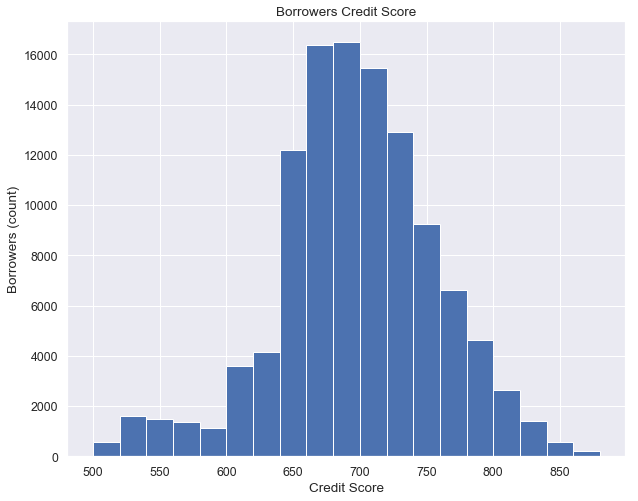

In [18]:
#Plotting our distribution for CreditScoreMean
bins = np.arange(500, 900, 20)
plt.figure(figsize=(10, 8))
plt.hist(data = Condensed_prosper, x = 'CreditScoreMean', bins=bins);
plt.title('Borrowers Credit Score');
plt.xlabel('Credit Score')
plt.ylabel('Borrowers (count)');

This plot is for the most part normally distributed with the majority of borrowers having a credit score between 650 and 750. Our mode falls around the 670 mark. According to Experian which is one of the credit report agencies in the US: "a credit score of 700 or above is generally considered good. A score of 800 or above on the same range is considered to be excellent. Most credit scores fall between 600 and 750." We actually have very few in the 600-650 range. I think it's fair to say that our borrowers are slightly above average. Credit score has long been considered the gold standard in determining a borrower's credit worthiness. Let's see how this compares to the relatively new prosper score.

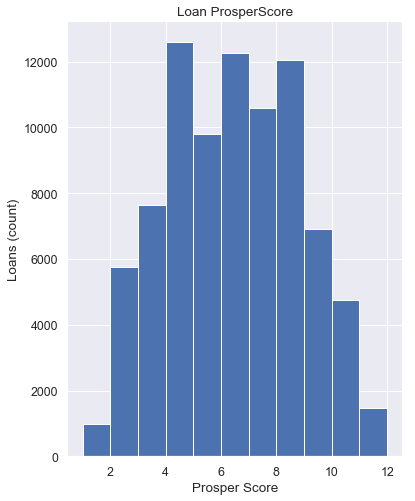

In [19]:
#Plotting our distribution for ProsperScore
bins = np.arange(1, 13, 1)
plt.figure(figsize=(6, 8))
plt.hist(data = Condensed_prosper, x = 'ProsperScore', bins=bins);
plt.title("Loan ProsperScore");
plt.xlabel('Prosper Score')
plt.ylabel('Loans (count)');

This prosperscore is quite interesting, our mode is a 4 which is quite low. This indicates that most loans are considered to be high risk. This is telling us a very different story from our credit rating. Let's have a look at our Term variable to see how long most loans are. 

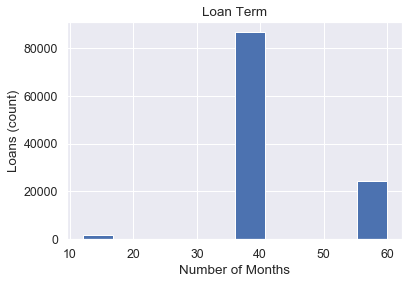

In [20]:
# Using Hist to plot our distribution for term
plt.hist(data = Condensed_prosper, x = 'Term');
plt.title('Loan Term')
plt.xlabel('Number of Months')
plt.ylabel('Loans (count)');

Prosper loans are given in 12, 36 and 60 month terms. It's clear that the majority of our borrowers are opting for a 36 month term. We shall now have a look at what the typical interest rate of a prosper loan is.

In [21]:
# Let's use describe so we can find out what might be the best choice for our bins
Condensed_prosper['MonthlyLoanPayment'].describe()

count    112684.000000
mean        274.107320
std         192.749257
min           0.000000
25%         133.797500
50%         220.490000
75%         372.600000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [22]:
# Find Outliers
Condensed_prosper['MonthlyLoanPayment'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, .97, 1])

0.00       0.000
0.10      80.570
0.20     117.910
0.30     152.830
0.40     173.710
0.50     220.490
0.60     280.870
0.70     341.780
0.80     405.488
0.90     537.330
0.97     734.640
1.00    2251.510
Name: MonthlyLoanPayment, dtype: float64

In [23]:
# Remove all Monthly Loan Payments above 699
Condensed_prosper = Condensed_prosper[Condensed_prosper.MonthlyLoanPayment < 700]

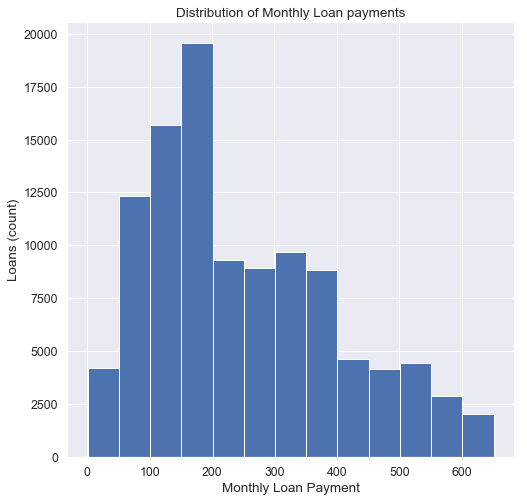

In [24]:
# Using Hist to plot our distribution for MonthlyLoanPayment
bins = np.arange(1, 700, 50)
plt.figure(figsize=(8, 8))
plt.hist(data = Condensed_prosper, x = 'MonthlyLoanPayment', bins=bins);
plt.title('Distribution of Monthly Loan payments')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loans (count)');

The majority of prosper loans monthly payments are below 400, with the highest frequency falling between 150-200. Depending on what other debts a borrower may have these payment amount seem to be quite sustainable and shouldn't have too much of an impact on a borrower's ability to repay. To better understand the impact these payments might have it seems reasonable to next understand the income levels of our borrowers.

In [25]:
# Once again using describe to determine appropriate bins
Condensed_prosper['StatedMonthlyIncome'].describe()

count    1.088730e+05
mean     5.458157e+03
std      7.430417e+03
min      0.000000e+00
25%      3.166667e+03
50%      4.583333e+03
75%      6.666667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

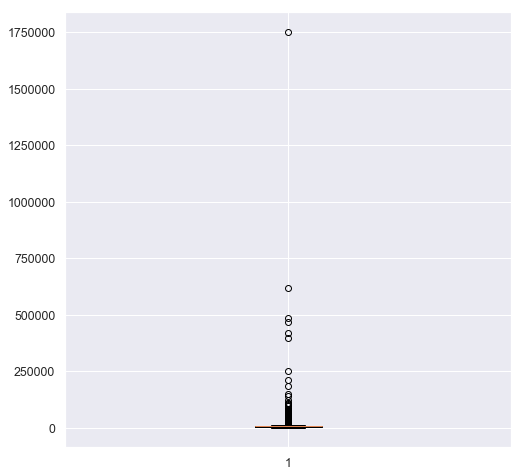

In [26]:
# Find Outliers
plt.figure(figsize=(8, 8))
plt.boxplot(Condensed_prosper.StatedMonthlyIncome);

Although it's quite possible that some people make over 100,000 a month I'm not going to include these in my analysis as it is not indicative of the rest of the dataset, as such I will monthly income at 15,000 which is 180,000 annually.

In [27]:
Condensed_prosper = Condensed_prosper[Condensed_prosper.StatedMonthlyIncome < 15000]

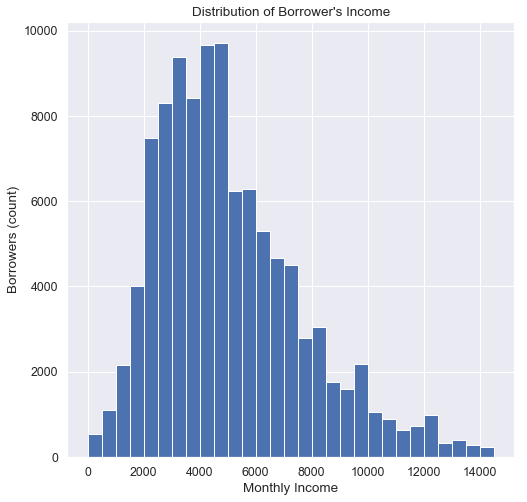

In [28]:
# Using Hist to plot our distribution for StatedMonthlyIncome
bins = np.arange(1, 15000, 500)
plt.figure(figsize=(8, 8))
plt.hist(data = Condensed_prosper, x = 'StatedMonthlyIncome',bins=bins)
plt.title("Distribution of Borrower's Income")
plt.xlabel('Monthly Income')
plt.ylabel('Borrowers (count)');

It appears as though most of our borrowers have a monthly income of roughly 5,000. This distribution is right skewed with some long tails. Kind of interesting that some of our borrowers have a monthly income over 10K and are choosing to turn towards the P2P lending market. This is self reported income though so who knows how accurate this is. Considering most of the monthly loan payments are around 300 this shouldn't put too much stress on our borrowers. However without knowing what other expenses a borrower has it's hard to make this claim with any certainty. Next I'd like to explore APR to see how much interest our borrowers are paying. 

In [29]:
#Let's use describe to see how we may place our bins.
Condensed_prosper['BorrowerAPR'].describe()

count    106415.000000
mean          0.220895
std           0.080725
min           0.006530
25%           0.157840
50%           0.212900
75%           0.287040
max           0.423950
Name: BorrowerAPR, dtype: float64

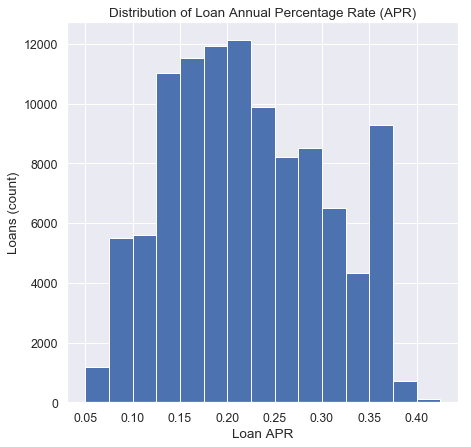

In [30]:
# Using Hist to plot our distribution for APR
bins = np.arange(0.05, 0.45, 0.025)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'BorrowerAPR', bins=bins)
plt.title('Distribution of Loan Annual Percentage Rate (APR)')
plt.xlabel('Loan APR')
plt.ylabel('Loans (count)');

Our distribution here is almost normally distributed, however it does have a slight right skew. With a large amount of loans in the 0.35 - 0.375 range. The mode is between 0.2 - 0.25, our borrowers must be pretty desperate to accept these loans. These rates are worse than pretty much every credit card there is on the market. A loan with an APR above 0.35 is pretty much usury. Let's have a look at their debt to income ratio to see if we can better understand the financial situation of our borrowers. 

In [31]:
#Let's use describe to see how we may place our bins.
Condensed_prosper['DebtToIncomeRatio'].describe()

count    98379.000000
mean         0.277129
std          0.532110
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

Some of this data is indicating a DTI as high as 10. I won't be including any rows that indicate a DTI higher than 1.

In [32]:
# remove outliers from DTI
Condensed_prosper = Condensed_prosper[Condensed_prosper.DebtToIncomeRatio < 1]

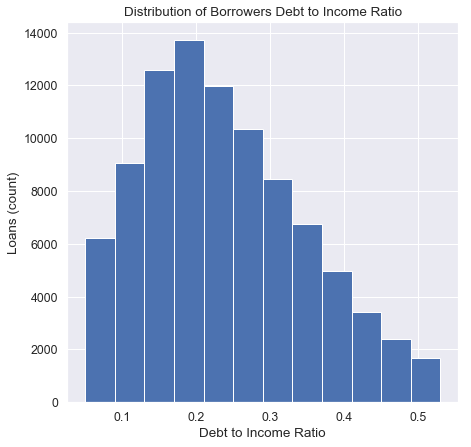

In [33]:
# Using Hist to plot our distribution for DebtToIncomeRatio
bins = np.arange(0.05, 0.55, 0.04)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Borrowers Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loans (count)');

This distribution is once again right skewed like the last few we have explored. This is quite surprising to be honest. Based on standard finance metrics the majority of these people seem to be in pretty good financial health. Typically if you have a DTI below 0.36 it's considered to be quite good. The mode of our distribution is below 0.2, I'm quite curious to know why these people are turning to the P2P markets. Could this be the result of strict lending criteria, a lack of financial literacy or is the typical loan approval process just too onerous for our borrowers? Next let's explore how much are these borrowers carrying in revolving balances.

In [34]:
#Using describe to better determine bin placement
Condensed_prosper['RevolvingCreditBalance'].describe()

count     91790.000000
mean      15504.080858
std       25302.287717
min           0.000000
25%        3020.250000
50%        8138.000000
75%       18012.750000
max      999165.000000
Name: RevolvingCreditBalance, dtype: float64

In [35]:
# Find Outliers
Condensed_prosper['RevolvingCreditBalance'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 1])

0.00         0.00
0.10       636.00
0.20      2092.00
0.30      3935.70
0.40      5843.00
0.50      8138.00
0.60     11086.00
0.70     15208.30
0.80     21862.00
0.90     35801.10
0.95     52798.55
0.97     70437.95
1.00    999165.00
Name: RevolvingCreditBalance, dtype: float64

97% of our data is below 85,000. As such I will not be keeping any values that are above this amount

In [36]:
Condensed_prosper = Condensed_prosper[Condensed_prosper.RevolvingCreditBalance < 85001]

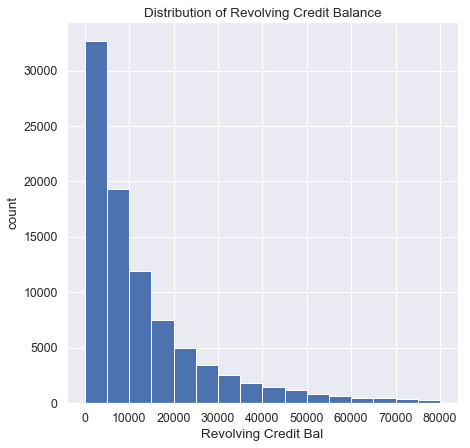

In [37]:
# Using Hist to plot our distribution for APR
bins = np.arange(0, 85000, 5000)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'RevolvingCreditBalance', bins=bins)
plt.title('Distribution of Revolving Credit Balance')
plt.xlabel('Revolving Credit Bal')
plt.ylabel('count');

Once again, yet another heavily right skewed distribution. It appears as though most of our borrowers have less than 5,000 in revolving credit balances. This data is counterintuitive, our borrowers seem to be in a pretty good financial situation, and pretty well safeguarded against a financial disaster. Let's find out where our borrowers are located.

In [38]:
#Grab the top 20 states where our borrowers are located in from our dataset
State = Condensed_prosper['BorrowerState'].value_counts()[:20]

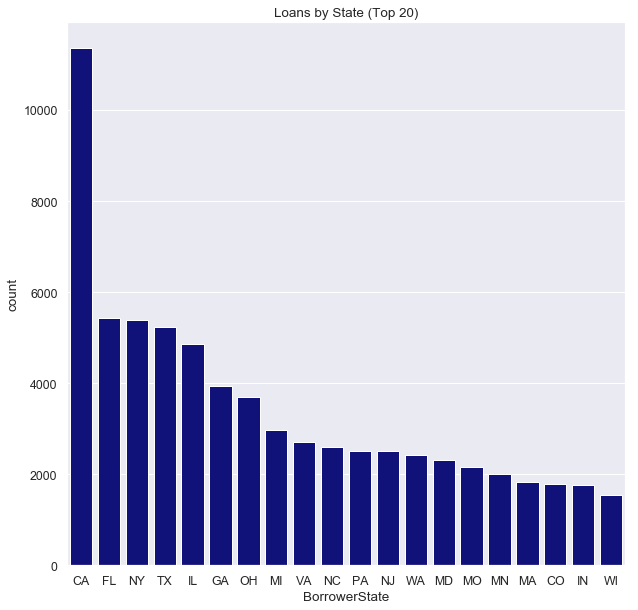

In [39]:
#Drawing our distribution for ProsperScore
plt.figure(figsize=(10, 10))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
sb.countplot(x='BorrowerState', data=Condensed_prosper, color="darkblue",order=Condensed_prosper['BorrowerState'].value_counts().iloc[:20].index);
plt.title('Loans by State (Top 20)');


It appears as though the majority of our borrowers hail from California, Texas, New York and Florida. This seems to coincide with the fact that these are some of the most densely populated states in the US. The last variable I would like to explore is the Listing Category to better understand why our borrowers are tsking out loans.

In [40]:
# Rename column to Listing Category and change to string
Condensed_prosper.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
Condensed_prosper['ListingCategory'] = Condensed_prosper['ListingCategory'].astype('str')

In [41]:
# Replace our numerical categories with their appropriate definitions then convert the data type to categorical
cat_names = {'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement', '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure', '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses', '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle', '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}
Condensed_prosper['ListingCategory'].replace(cat_names, inplace=True)
Condensed_prosper['ListingCategory'] = Condensed_prosper['ListingCategory'].astype('category')

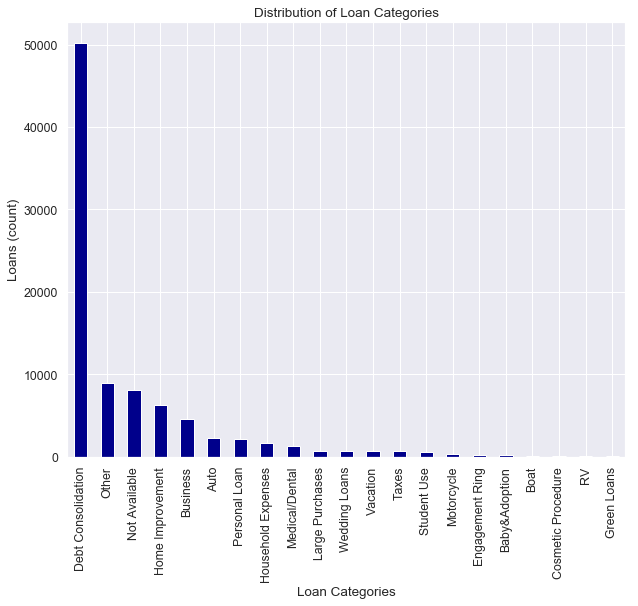

In [42]:
# Plot our loan category distribution 
plt.figure(figsize=(10, 8))
pd.value_counts(Condensed_prosper['ListingCategory']).plot.bar(color='darkblue');
plt.title('Distribution of Loan Categories');
plt.xlabel('Loan Categories')
plt.ylabel('Loans (count)');

This chart just further confuses me, debt consolidation is more than 5 times the count of the next category. Unfortunately the next two are NA and Other which doesn't really provide us with much value. This chart in isolation looks good because you have people actively taking steps to improve their financial situation. On the other hand with a mean APR of nearly 22% you have to wonder what types of loans could they possibly be consolidating that would have a rate higher than that.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

I found the exploration quite insightful, as I started my analysis I was quite confused as sone of the data points seem to be telling completely different stories. Once I got to the APR distribution I started to believe that these borrowers must be in severe financial trouble. However most of the other data showed otherwise, they had slightly above average credit scores, very good debt to income ratios and minimal revolving credit balances. They also seem quite financially responsible as they are being proactive in trying to improve their financial situations by opting to consolidate their debt. However with a mean APR of 21.8% these borrowers must have taken on some really bad loans in the past. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were some outliers in some of the columns that i had to remove I also added some new columns:
    - Added a Quarters column to group Listing dates by Quarter
    - Added a new Credit Score column that is the mean of the Upper and Lower Credit Score range columns
    - Converted the ListingCategory col to a category datatype
    - Changed numerical value to the category they were given with the definition provided
    - Removed all monthly income above 15,000
    - Removed DTI above 1
    - Removed RevolvingCreditBalance above 85,000
    - Removed Credit Scores below 500
    - Removed Monthly Loan payments above 699

## Bivariate Exploration

We'll now move into some Bivariate Exploration to better understand some of the relationships that our variables possess.

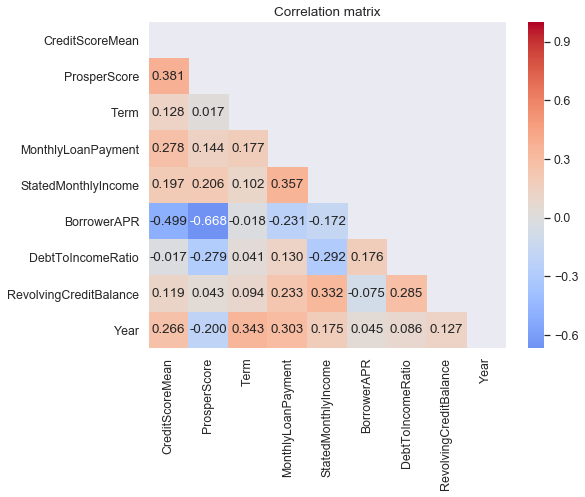

In [114]:
#we'll use our correlation matrix to determine if there are any variables that are highly correlated
plt.figure(figsize = [8,6])

mask = np.zeros_like(Condensed_prosper.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(Condensed_prosper.corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0, mask=mask)
plt.title('Correlation matrix');

The strongest correlation in our dataset is BorrowerAPR and ProsperScore which have a negative correlation of -66.8 so as ProsperScore increases APR should decrease. BorrowerAPR and CreditScoreMean is the next strongest relationship at -49.9 same idea, CreditScoreMean increases as interest rates decrease. After that the next strongest correlation is CreditScoreMean and ProsperScore which also makes sense since they are essentially different tools trying to achieve the same purpose, quantify the risk of the loan. I chose to mask the top half of the correlation matrix as it is essentially a mirror of the bottom half. I found that with all that extra information that essentially provides no extra value it can be more difficult to interpret the plot as it can be hard to focus at least for me.

So when I initially attempted a seaborn pairplot i ran my entire dataset. This took forever and due to the sheer volume of data points it was quite difficult to notice any patterns. As such I decided to switch it up and run a sample of 500 rows instead.

In [56]:
# Create Sample DF
sample_data = np.random.choice(Condensed_prosper.shape[0], 500, replace = False)
df_samp = Condensed_prosper.loc[sample_data,:]
num_vars = ['ProsperScore', 'MonthlyLoanPayment', 'BorrowerAPR', 'DebtToIncomeRatio', 'RevolvingCreditBalance', 'CreditScoreMean']

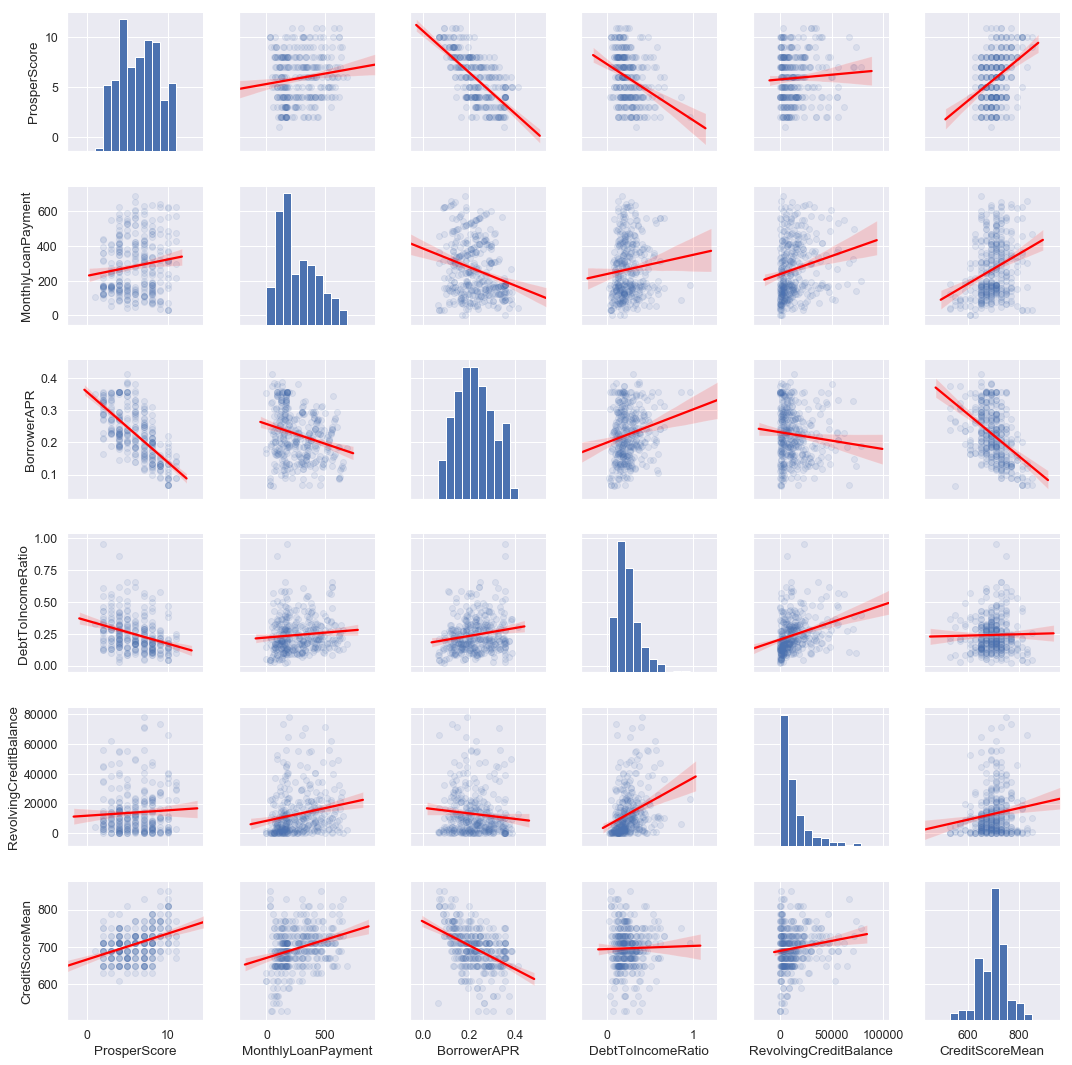

In [57]:
# We'll use pairplot to see relationships amongst numerical variables
g = sb.pairplot(data=df_samp, vars=num_vars, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Borrower APR and Prosper Score demonstrate the clearest trend of all our plots, Credit Score and Borrower APR also seem to be linked. Debt to Income ratio and Prosper score also seem to be negatively correlated. Let's tale a closer look at CreditScore and APR

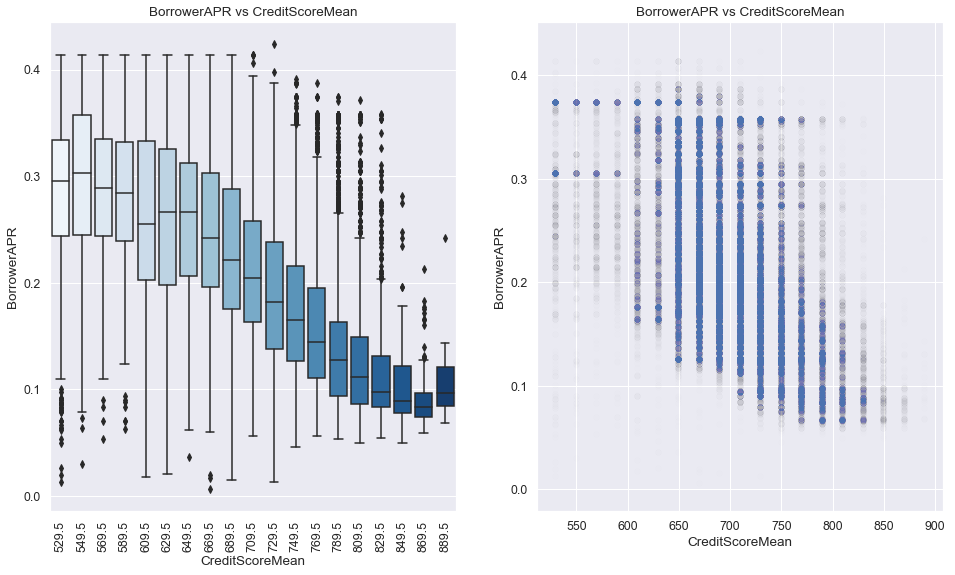

In [47]:
#BoxPLot and Scatter plot
plt.subplot(1, 2, 1)
ax = sb.boxplot(data = Condensed_prosper, x = 'CreditScoreMean', y = 'BorrowerAPR', palette="Blues")
plt.gcf().set_size_inches(16, 9)
plt.title('BorrowerAPR vs CreditScoreMean');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');
ax.set_xticklabels([t.get_text()  for t in ax.get_xticklabels()],rotation=90)


# Scatter plot to show relationship between Creditscore and APR
plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(16, 9)
plt.scatter('CreditScoreMean', 'BorrowerAPR', data=Condensed_prosper, alpha = 0.003);
plt.title('BorrowerAPR vs CreditScoreMean');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');

By adding alpha to our plot the relationship starts to become much more clear. There is a negative correlation between credit score and APR. In other words as your credit score increases, your interest rate decreases. This of course is what we would expect. This is a reflection of the inherent risk in lending money, as a borrower demonstrates less risky tendencies, lenders are willing to give the borrower preferred rates. The box plot helps to make this trend visualization a bit more clear.

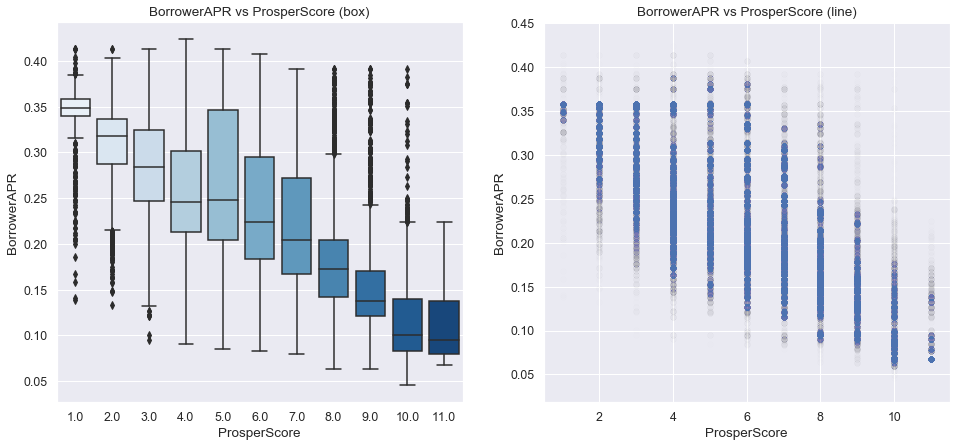

In [120]:
#BoxPLot and Scatter plot
plt.subplot(1, 2, 1)
sb.boxplot(data = Condensed_prosper, x = 'ProsperScore', y = 'BorrowerAPR',palette="Blues")
plt.title('BorrowerAPR vs ProsperScore (box)');
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

# Scatter plot to show relationship between Creditscore and APR
plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(16, 7)
plt.scatter('ProsperScore', 'BorrowerAPR', data=Condensed_prosper, alpha = 0.003);
plt.title('BorrowerAPR vs ProsperScore (line)');
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

This plot shows us a very similar picture to our credit score plot, which of course is to be expected. Higher prosper score equals lower rates. It's a bit hard to say this with any kind of certainty however the prosper score seems to have a much more defined trend. Whereas when you get into the 600-750 range of the credit score we have a much wider of behavior. Could the Prosper score be superior to the credit score? Let's explore that relationship and see if we can draw any conclusions

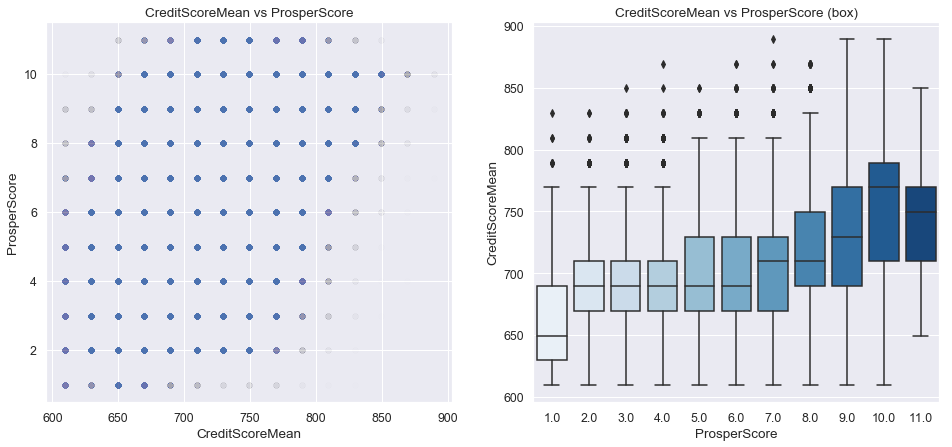

In [327]:
# Scatter plot to show relationship between CreditScore and ProsperScore
plt.subplot(1, 2, 1)
plt.scatter('CreditScoreMean', 'ProsperScore', data=Condensed_prosper, alpha = 0.003);
plt.title('CreditScoreMean vs ProsperScore');
plt.xlabel('CreditScoreMean')
plt.ylabel('ProsperScore');

#Boxplot to show relationship between CreditScore and ProsperScore
plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(16, 7)
sb.boxplot(data = Condensed_prosper, x = 'ProsperScore', y = 'CreditScoreMean',palette="Blues")
plt.title('CreditScoreMean vs ProsperScore (box)');
plt.xlabel('ProsperScore')
plt.ylabel('CreditScoreMean');

This seems like an odd result to me. Our correlation matrix does indicate that there is a 0.381 positive correlation between these variables. This is demonstrated by the fact that once we get above 800 we have very few points below 2. However there are some borrowers with a 650 credit score that have a prosper score above 10. I think the box plot does a better job of representing this relationship. Ranges 1 - 8 seem to have a much stronger relationship with credit score. 9-10 seem to include pretty much the entire range of credit scores with an increasing median. Range 11 seems to be quite odd, we have a higher minimum and also a lower maximum and median, quite odd!<br> 

From the prosper website: 
A custom risk score was built using historical Prosper data to assess the risk of Prosper borrower listings. The output to Prosper users is a Prosper score which ranges from 1 to 11, with 11 being the best, or lowest risk, score. The worst, or highest risk, score, is a 1. Unlike a credit bureau score, which is based on a much wider variety of loan performance, the Prosper score is specifically built on the Prosper borrower and applicant population. As such, the credit reporting agency score should, and does, rank order risk on the Prosper population, but is not as discriminating as the custom score.
<br>

Interesting how even though they use the credit score in their model, it's clearly designed to take other factors in consideration so that it's not as discriminatory. Next I'd like to see the relationship between borrower APR and DTI.

In [ ]:
# Scatter plot to show relationship between DebtToIncomeRatio and APR
plt.figure(figsize = [10,8])
plt.scatter('DebtToIncomeRatio', 'BorrowerAPR', data=Condensed_prosper, alpha = 0.003);
plt.title('BorrowerAPR vs DebtToIncomeRatio');
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerAPR');


This plot isn't overly exciting. While we can see a slight correlation (0.17) as we start to get into higher debt income ratios we start to notice that our APR starts to rise, however this is nothing to write home about. Let's explore APR vs Stated monthly income.

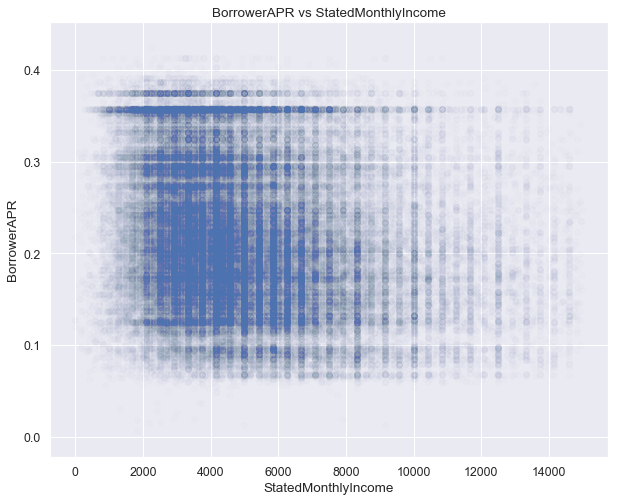

In [51]:
# Scatter plot to show relationship between StatedMonthlyIncome and APR
plt.figure(figsize = [10,8])
plt.scatter('StatedMonthlyIncome', 'BorrowerAPR', data=Condensed_prosper, alpha = 0.01);
plt.title('BorrowerAPR vs StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('BorrowerAPR');

This plot doesnt offer up too much either. We can see that the majority of our borrowers have an income around 4000 and their APR seems to be all over the place with the highest concentration falling around 0.2 <br>
Let's see the relationship between Income and Payments.

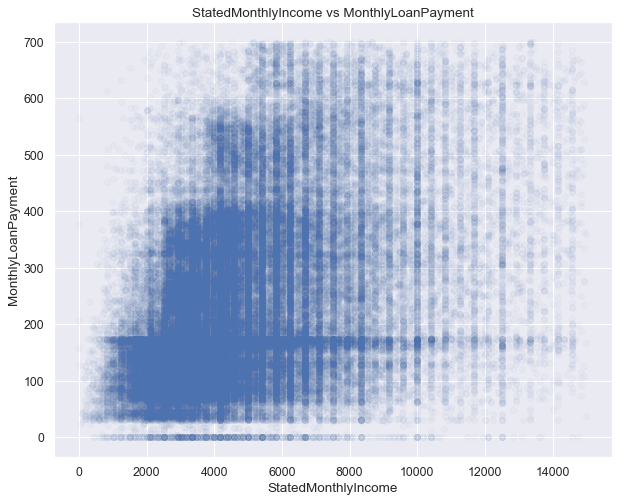

In [52]:
#use scatter to further investigate StatedMonthlyIncome vs MonthlyLoanPayment
plt.figure(figsize = [10,8])
plt.scatter('StatedMonthlyIncome', y='MonthlyLoanPayment', data = Condensed_prosper, alpha = 0.03);
plt.title('StatedMonthlyIncome vs MonthlyLoanPayment');
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('MonthlyLoanPayment');

Once again nothing super exciting. We can see a slight correlation, as income rises as our monthly payment rises along with it. 
Up next income vs revolving credit balance.

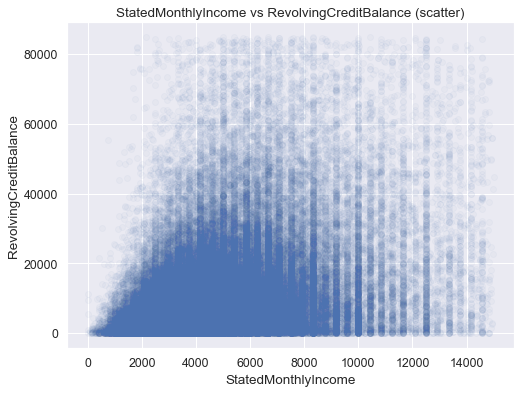

In [331]:
#use scatter to further investigate StatedMonthlyIncome vs RevolvingCreditBalance
plt.figure(figsize = [8,6])
plt.scatter('StatedMonthlyIncome', y='RevolvingCreditBalance', data = Condensed_prosper, alpha = 0.03);
plt.title('StatedMonthlyIncome vs RevolvingCreditBalance (scatter)');
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('RevolvingCreditBalance');

This scatterplot of Income vs Revolving Credit balance doesn't really show us anything interesting. We can see that most borrowers make less than 8000 a month, with the majority making around 4000 a month and having around 20000 in revolving credit. I think it's safe to assume that the majority of these borrowers are taking out loans to consolidate credit card debt.

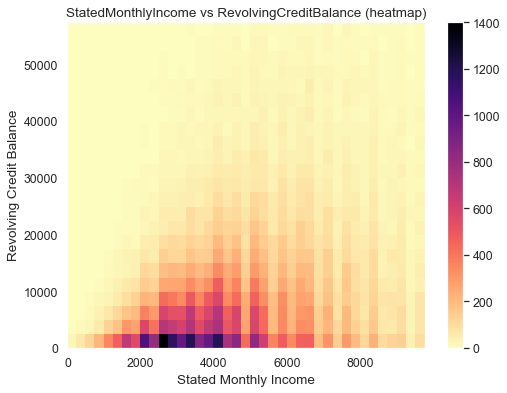

In [332]:
plt.figure(figsize = [8,6])
x_bins = np.arange(0, 10000, 250)
y_bins = np.arange(0, 60000, 2500)
plt.hist2d(data=Condensed_prosper, x='StatedMonthlyIncome', y='RevolvingCreditBalance', bins= [x_bins, y_bins], cmap='magma_r')
              

plt.colorbar()
plt.title('StatedMonthlyIncome vs RevolvingCreditBalance (heatmap)');
plt.xlabel('Stated Monthly Income')
plt.ylabel('Revolving Credit Balance');

Tried replotting this graph using heatmap and different bin sizes, this doesn't give us much more to look at. Unfortunately the past few graphs have kind of been a dead end. So let's take this in a different direction. When dealing with money lending interests rates are of huge importance (APR). Let's see how interest rates might be changing over time.

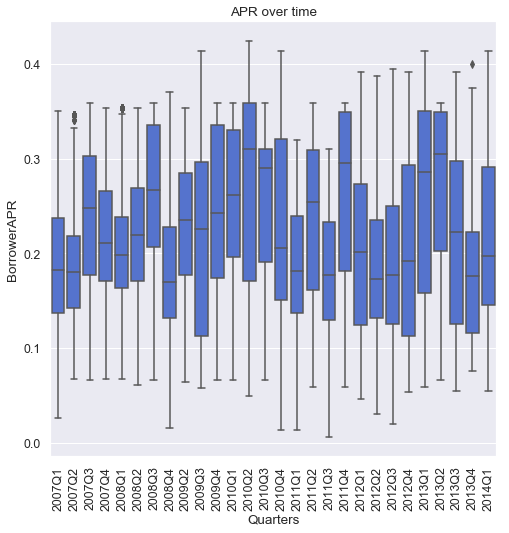

In [84]:
# Sort dates
sorted_dates = sorted(Condensed_prosper.Quarters.unique())
# use boxplot to further investigate APR vs Quarters
plt.figure(figsize = [8,8])
ax = sb.boxplot(x = 'Quarters', y='BorrowerAPR', data = Condensed_prosper, color = "royalblue");
plt.title('APR over time (Q)');
ax.set_xticklabels(sorted_dates,rotation=90);

This chart has way too much going on. I'm going to change the frequency to year and see if that might give us a clearer picture.

In [83]:
# Add year column
Condensed_prosper['Year'] = pd.to_datetime(Condensed_prosper['ListingCreationDate']).dt.year
# Check this was completed correctly
Condensed_prosper.Year.head()

0    2007
1    2014
3    2012
4    2013
5    2013
Name: Year, dtype: int64

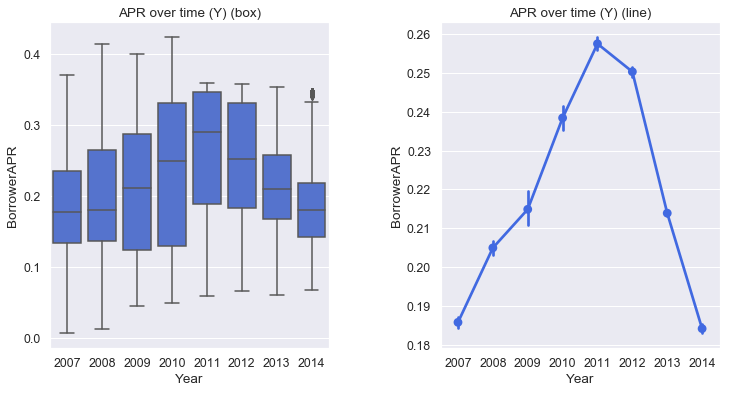

In [121]:
#Replotting our boxplot with year instead of quarters
plt.subplot(1, 2, 1)
plt.gcf().set_size_inches(12, 6)
ax = sb.boxplot(x = 'Year', y='BorrowerAPR', data = Condensed_prosper, color = "royalblue");
plt.title('APR over time (Y) (box)');

# Use line plot to represent APR over time
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.4)
plt.gcf().set_size_inches(12, 6)
sb.pointplot(data = Condensed_prosper, x='Year', y='BorrowerAPR', color='royalblue');
plt.title('APR over time (Y) (line)');

By changing to year the trend becomes much more clear, we can see that our median interest rates rose until 2011 at which point it has started to trend downwards. The box plot gives us much more detail than our line plot in this instance. We can see that our all time high in interest rates came in 2010 as indicated by the whiskers however the median peak came a year later in 2012. Since then the median has continued to drop, another piece of information our box plot gives us is that in the past two years the body of our box plots has narrowed and since 2011 the overall range of interest rates has decreased as well this is good news for borrowers, lenders not so much. Could this be the result of less risky borrowers coming into the market?

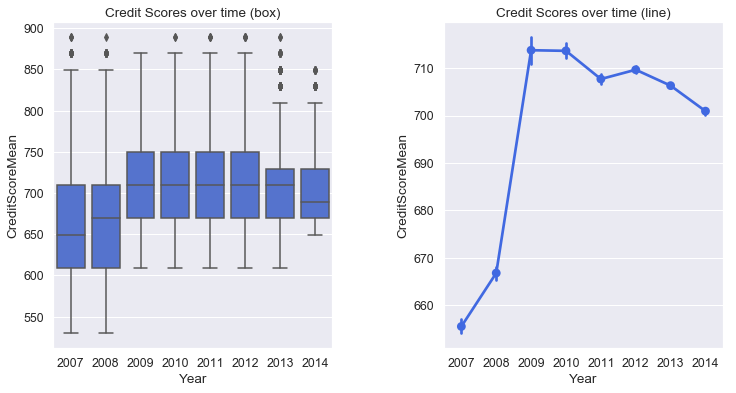

In [122]:
#Time series plot of APR over creditscore
plt.subplot(1, 2, 1)
plt.gcf().set_size_inches(12, 6)
ax = sb.boxplot(x = 'Year', y='CreditScoreMean', data = Condensed_prosper, color = "royalblue");
plt.title('Credit Scores over time (box)');

# Use line plot to represent APR over time
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.4)
plt.gcf().set_size_inches(12, 6)
sb.pointplot(data = Condensed_prosper, x='Year', y='CreditScoreMean', color='royalblue');
plt.title('Credit Scores over time (line)');

This data doesn't seem to support the idea that we have higher quality borrowers coming onto the platform, credit score ranges were stable between 2009 and 2012, medians were stable between 2009 and 2013. In the past few years credit scores have actually decreased. Could Credit Score be a leading indicator? Unfortunately, I don't think we'll be able to answer that question. How have prosper scores changed over time? ProsperScores had a higher correlation to APR so maybe that can help us see a different perspective.

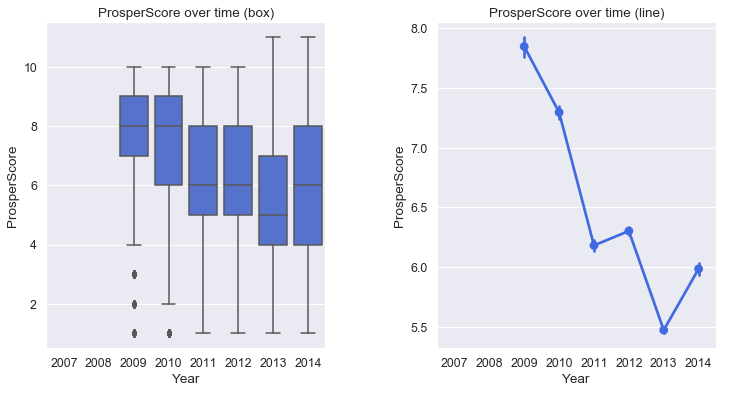

In [117]:
#Time series plot of APR over ProsperScore
plt.subplot(1, 2, 1)
plt.gcf().set_size_inches(12, 6)
ax = sb.boxplot(x = 'Year', y='ProsperScore', data = Condensed_prosper, color = "royalblue");
plt.title('ProsperScore over time (box)');

# Use line plot to represent APR over time
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.4)
plt.gcf().set_size_inches(12, 6)
sb.pointplot(data = Condensed_prosper, x='Year', y='ProsperScore', color='royalblue');
plt.title('ProsperScore over time (line)');

This data is in line with the credit scores. We're actually seeing lower quality borrowers as time passes. Aside from 2014 it has been a downtrend with median decreasing and the lower quartile decreasing since 2009. As previously stated I'm inclined to believe that risk ratings are a leading indicator and then interest rates will then follow suit as higher levels of defaults are seen. Next I'd like to see have borrowing categories changed over time?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I found it very interesting that the prosperscore was the number one factor in determining a borrower's APR. This of course makes sense seeing as it is their platform, one of the major barriers to accessing financing through the banking system is of course the credit score. By diminishing the importance put on credit score and devloping an in house proprietary model I think this is great for accessibility as most people were taking on loans to consolidate debt. My biggest concern however is with how high APRs are through this platform, however if they are taking on lower interest rate loans then they are currently paying on a fixed payment schedule as opposed to revolving this is of course a win. Hopefully they are not just clearing up available space on the their cards to then spend again.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When I initially charted APR by Quarters I thought this a waste of time, the chart was all over the place and didn't give me any important information. However once I grouped the quarters into years there were some key trends that started to appear.
APR was decreasing over time which is great for borrowers, due to the negative correlation with Credit Score and Prosper Score my initial assumption was that we must be getting higher quality borrowers coming into the market. However it was the exact opposite, Credit Score and Prosper Score were both decreasing over time. This leads me to believe that APR must be a lagging indicator.

## Multivariate Exploration

Let's revisit the relationship between CreditScore and APR but now let's add in our ProsperScore

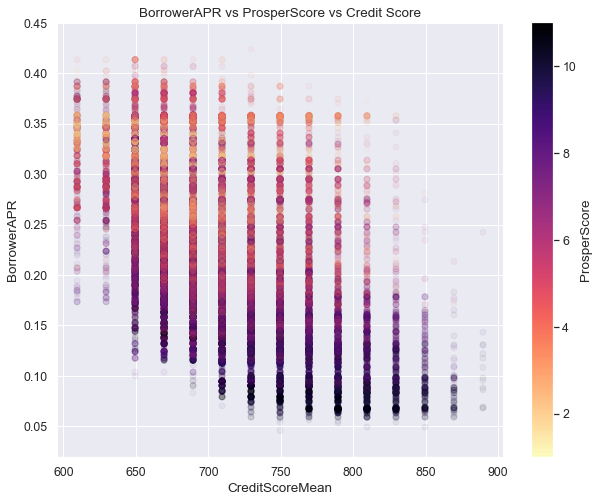

In [249]:
# Scatter plot to show relationship between Creditscore, ProsperScore and APR
plt.figure(figsize = [10,8])
plt.scatter(data=Condensed_prosper, x='CreditScoreMean', y='BorrowerAPR', c='ProsperScore', cmap='magma_r', alpha=0.05);
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('BorrowerAPR vs ProsperScore vs Credit Score');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');

Here we can see that the best APRs (Below 0.1) are mostly borrowers with a Prosperscore above 10. There are also very few loans in that range for individuals who have credit ratings below 700. We'll add in Year for our individual plots and see how this changes our plots

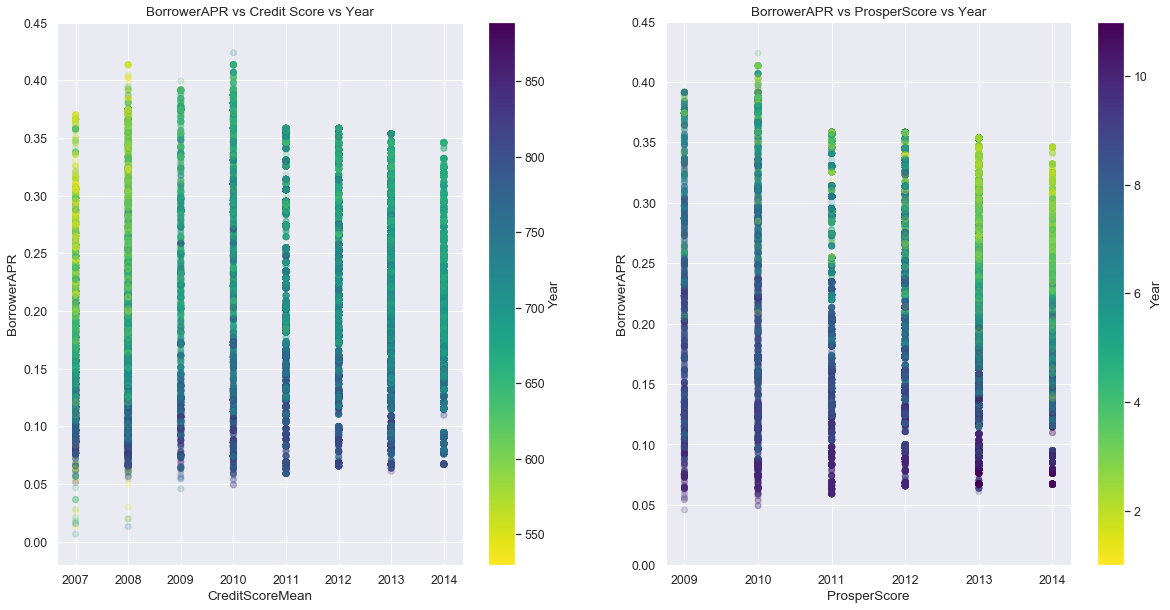

In [323]:
# Scatter plot to show relationship between Creditscore, ProsperScore and APR
plt.subplot(1, 2, 1)
plt.gcf().set_size_inches(20, 10)
plt.subplots_adjust(wspace=0.3)
plt.scatter(data=Condensed_prosper, x='Year', y='BorrowerAPR', c='CreditScoreMean', cmap='viridis_r', alpha=0.2);
cbar = plt.colorbar(label='Year')
cbar.solids.set(alpha=1)
plt.title('BorrowerAPR vs Credit Score vs Year');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');
plt.yticks(np.arange(0, 0.5, step=0.05));

plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(20, 10)
plt.subplots_adjust(wspace=0.2)
plt.scatter(data=Condensed_prosper, x='Year', y='BorrowerAPR', c='ProsperScore', cmap='viridis_r', alpha=0.2);
cbar = plt.colorbar(label='Year')
cbar.solids.set(alpha=1)
plt.title('BorrowerAPR vs ProsperScore vs Year');
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');
plt.yticks(np.arange(0, 0.5, step=0.05));

Our Creditscore plot seems quite consistent with what we would expect, the best credit scores on the bottom and our rates increase we see lower scores. Something that is interesting is that in 2007-2008 we see some yellow colored plots which indicate lower credit scores. However after 2009 those yellow dots completely disappear. We also see much less points that have high credit scores. So less extreme borrowers. We start to see more "average" borrowers. 

Our ProsperScore plot however tells a different story. In the first few years a high prosper score was less indicative of whether you would get a preferred rate. But in the last few years the distribution is much more gradual and follows a similar trend to our credit score plot. On the other hand we start to see a lot more borrowers with lower prosper scores in the last few years. This could be either the result of investors developing more and more confidence in the Prosperscore rating or that Prosper has changed their proprietary model that develops their score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Plotting Credit Score and Prosper Score with APR made a lot of sense as these values demonstrated the highest level of correlation with BorrowerAPR and with each other. It really demonstrated that although Credit Score definitely played a significant factor there were certain individuals with a "Good" Credit Score (700 range) that had exxecellent Prosper Scores (10+). This allows them access to preferred (lower) interest rates. Why is this significant you may ask? 56% of our population of borrowers (possibly more 17,000 loans have NA or Other listed for reason) have listed debt consolidation as their reason for borrowing. Credit Scores are a known barrier to the financially underserved, those who opted to never get a credit card will not have a credit score, also if you had missed payments on your cell phone bill in your late teenage years because no one had explained to you the importance of a credit score those derogatory items remain on your credit bureau for 7 years. Reducing your access to those lower interest rates, banks won't lend you money if you have a low credit score but they have no problem giving you a credit card with an APR over 20.

### Were there any interesting or surprising interactions between features?

When I added in time, some interesting trends started to emerge. On the Credit Score plot we saw that as time passed the population of borrowers with very low credit scores decreased, however so did the population of those with high credit scores. In 2008-2009 when the world was hit hard with the financial crisis Prosper was no exception, we saw new loans fall off a cliff in 2008Q4 and 2009Q1. No doubt Prosper had to rethink their business model and restore confidence in their investors. I searched online and found that today Prosper requires a minimum credit score of 640.

The Prosper Score vs Borrower APR over Time was of course a different story, like Credit Score we would expect our plot to gradually move from dark to light. As risk increases so should your rate of interest. In the first few years this wasn't the case. We saw dark points all over the range and very few light points. Prosper was relatively new and investors were spooked from the financial crisis and were opting to only choose loans with higher Prosper scores. As time passed though we have started to see out plot much more normally distributed and an appetite for higher risk loans reemerge. 